In [1]:
%load_ext lab_black

# Cartopy and Gridding in python

This notebook contains an example code on how to make maps with cartopy and how to grid data, which is displayed on a map.

Notebook written by Maximilian Lowe (maxwe32@bas.ac.uk), last updated 05/04/2024

# Work in progress (no clean version jet / only brain dump)

We start by importing the necessary libraries for this jupyter notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cfeature
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import netCDF4 as nc4
from scipy.interpolate import griddata
from cmcrameri import cm

Cartopy is a Python package, which is dedicated to drawing maps and visualzing spatial data on maps. Drawing a base map in cartopy is relative easy and doesnt require a lot of code. We start simply and gradually increase our code with the aim of producing a nice overview map, which could be published.

**Lets start with a global map**

To be able to draw a map we need to create matplotlib figure. We do this by the command `figure1 = plt.figure(figsize=(8, 8))`.

Next we draw a subplot, which allows of plotting mutlple figures in one figure. Here we only plot one figure, so we set the subfigure parameters to `1, 1, 1,`. However, we need to give the figure axes (`ax1`) a projections.

Continue here, explain projection.


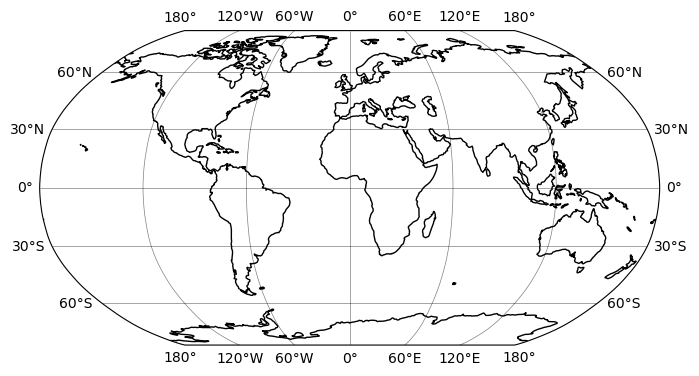

In [3]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

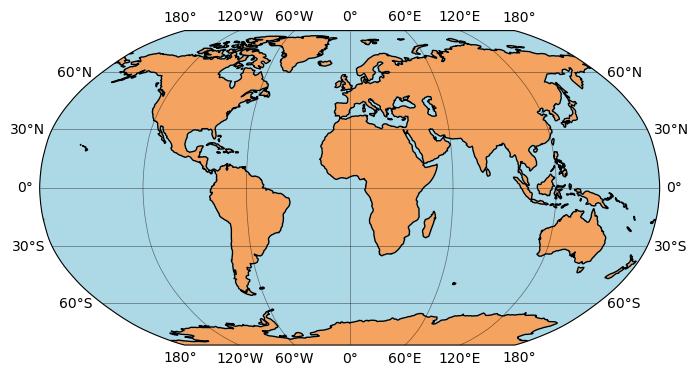

In [4]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAND, color="sandybrown")
ax1.add_feature(cfeature.OCEAN, color="lightblue")

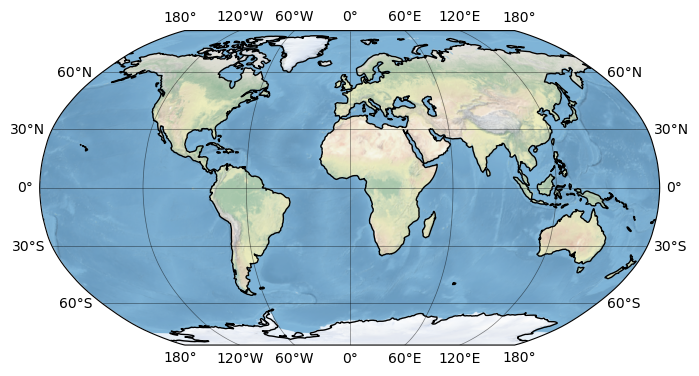

In [ ]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# feature scale 

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


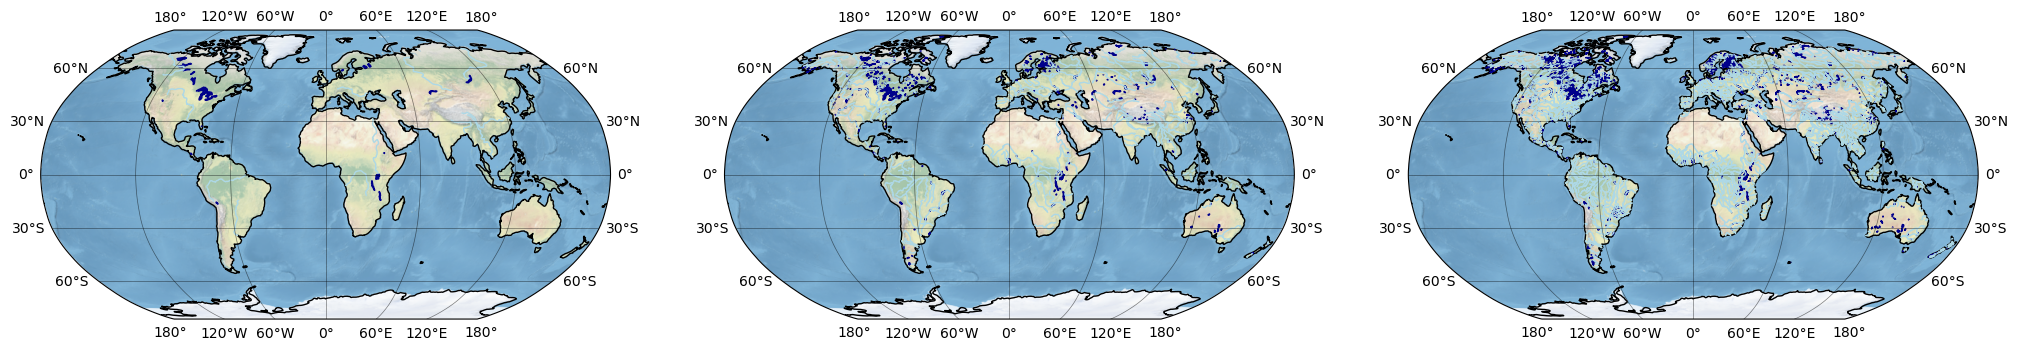

In [6]:
figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAKES.with_scale("110m"), color="darkblue")
ax1.add_feature(cfeature.RIVERS.with_scale("110m"), color="lightblue")

ax2 = plt.subplot(1, 3, 2, projection=ccrs.Robinson())
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax2.add_feature(cfeature.LAKES.with_scale("50m"), color="darkblue")
ax2.add_feature(cfeature.RIVERS.with_scale("50m"), color="lightblue")

ax3 = plt.subplot(1, 3, 3, projection=ccrs.Robinson())
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax3.add_feature(cfeature.LAKES.with_scale("10m"), color="darkblue")
ax3.add_feature(cfeature.RIVERS.with_scale("10m"), color="lightblue")

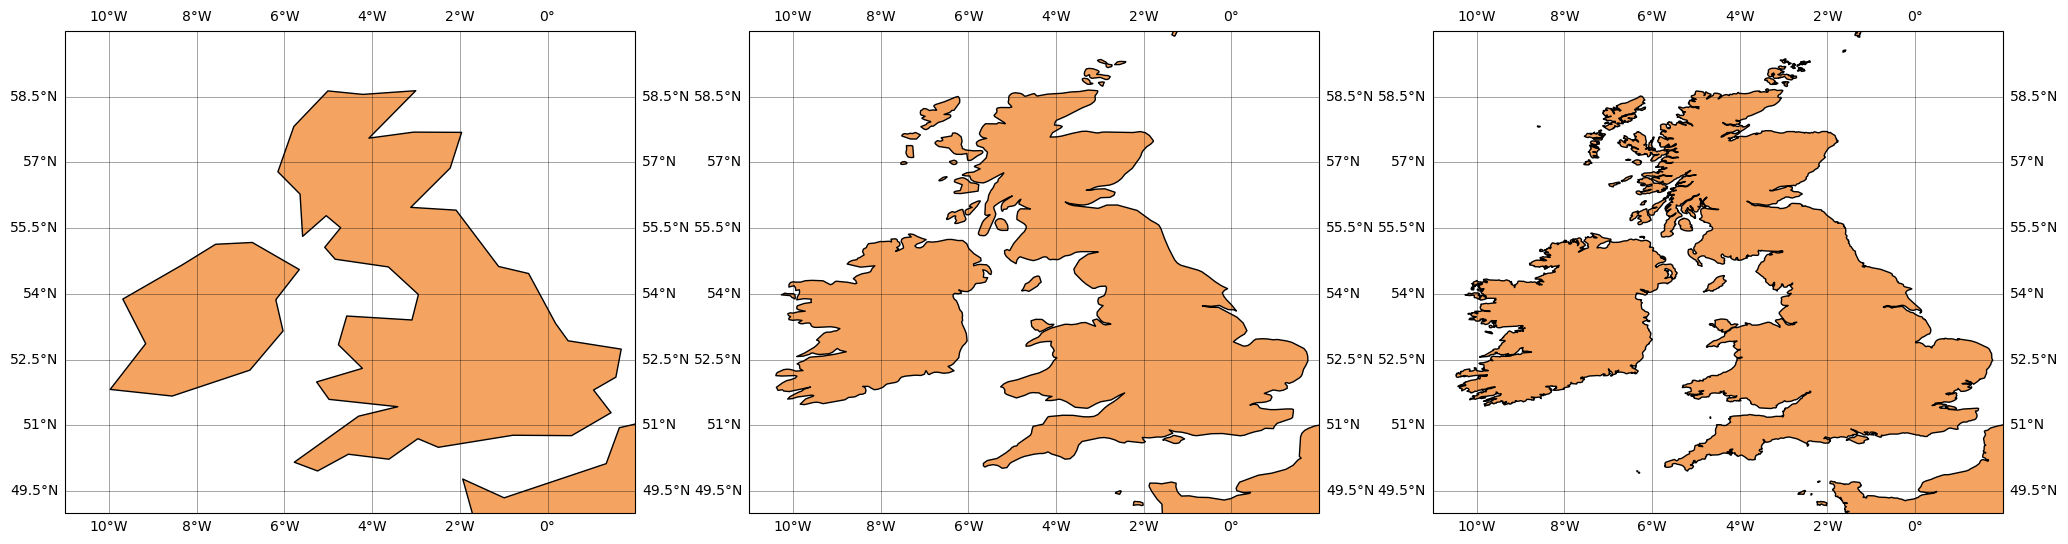

In [7]:
# Generate the coastline feature at three different scales
land_110m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "110m", edgecolor="k", facecolor="sandybrown"
)
land_50m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "50m", edgecolor="k", facecolor="sandybrown"
)
land_10m = cartopy.feature.NaturalEarthFeature(
    "physical", "coastline", "10m", edgecolor="k", facecolor="sandybrown"
)


figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.add_feature(land_110m)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-11, 2, 49, 60], crs=ccrs.PlateCarree())

ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax2.add_feature(land_50m)
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax3.add_feature(land_10m)
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# global map rotate

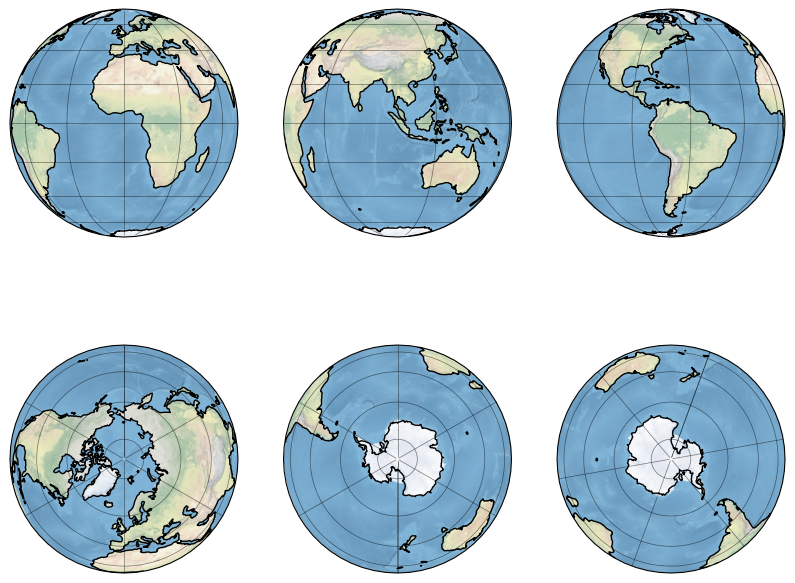

In [8]:
figure1 = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(
    2, 3, 1, projection=ccrs.Orthographic(central_latitude=0, central_longitude=0)
)
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax2 = plt.subplot(
    2, 3, 2, projection=ccrs.Orthographic(central_latitude=0, central_longitude=100)
)
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(
    2, 3, 3, projection=ccrs.Orthographic(central_latitude=0, central_longitude=290)
)
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax4 = plt.subplot(
    2, 3, 4, projection=ccrs.Orthographic(central_latitude=90, central_longitude=0)
)
ax4.stock_img()
ax4.coastlines()
ax4.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax5 = plt.subplot(
    2, 3, 5, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=0)
)
ax5.stock_img()
ax5.coastlines()
ax5.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax6 = plt.subplot(
    2, 3, 6, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=160)
)
ax6.stock_img()
ax6.coastlines()
ax6.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

 Plate Carrée (also known as Equirectangular or Equidistant Cylindrical.) 

## Projection and Transform arguments

The projected axes of cartopy maps are independent from the coordinate system of the used dataset. The `projection` arguments defines the map outlay. The `transform` argument tells Cartopy in which coordinate system the data is presented.

Lets have a look at an example using Lat Lon and polar steographix coordinates systems for Antarctica research stations operated by the British Antarctic Survey


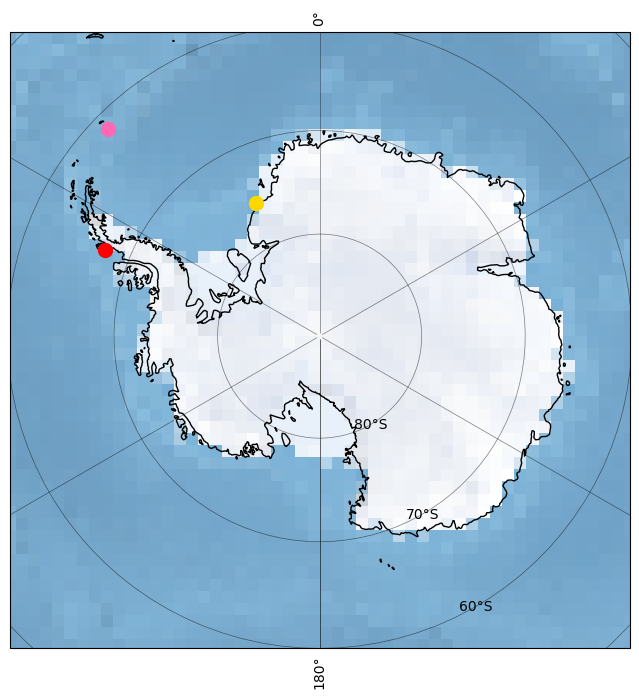

In [9]:
Rothera_lat = -67.56778
Rothera_lon = -68.12778
Halley_lat = -75.56805
Halley_lon = -25.50833
Signy_x_ps = -2322053.890662
Signy_y_ps = 2273923.172021

figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax1.plot(
    Rothera_lon,
    Rothera_lat,
    color="red",
    marker="o",
    markersize=10,
    transform=ccrs.PlateCarree(),
)
ax1.plot(
    Halley_lon,
    Halley_lat,
    color="gold",
    marker="o",
    markersize=10,
    transform=ccrs.PlateCarree(),
)
ax1.plot(
    Signy_x_ps,
    Signy_y_ps,
    color="hotpink",
    marker="o",
    markersize=10,
    transform=ccrs.SouthPolarStereo(),
)

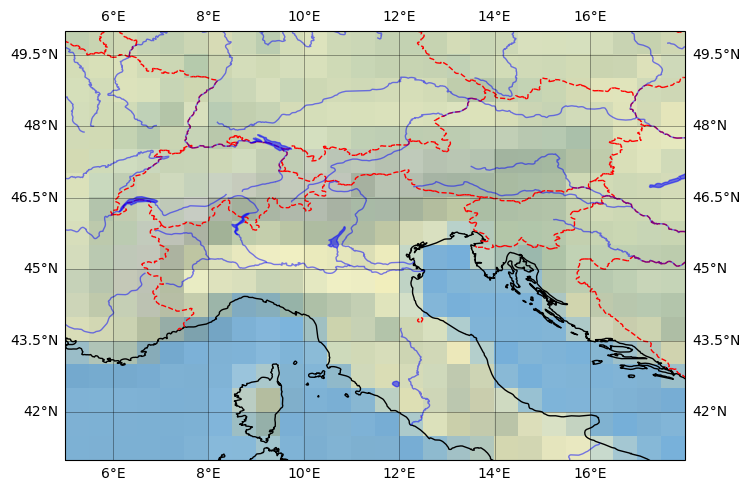

In [32]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 41, 50])
ax1.stock_img()
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# Gridding

In [12]:
nc1 = nc4.Dataset("ETOPO_2022_v1_30s_N90W180_bed.nc")

In [13]:
xq, yq = np.meshgrid(nc1.variables["lon"][:], nc1.variables["lat"][:], indexing="xy")

In [14]:
xflat = xq.flatten()
yflat = yq.flatten()
zflat = nc1.variables["z"][:].flatten()

In [15]:
test_coum = np.vstack((xflat, yflat, zflat)).T

In [16]:
alp_lon_index = (
    (test_coum[:, 0] > 5)
    & (test_coum[:, 0] < 18)
    & (test_coum[:, 1] > 41)
    & (test_coum[:, 1] < 50)
)

In [17]:
data_cut = test_coum[alp_lon_index, :]

In [18]:
xgrid, ygrid = np.meshgrid(
    np.unique(data_cut[:, 0]), np.unique(data_cut[:, 1]), indexing="xy"
)

In [19]:
Alp_topo_grid = griddata(
    (data_cut[:, 0], data_cut[:, 1]), data_cut[:, 2], (xgrid, ygrid), method="linear"
)

In [20]:
s_colormap = cm.bukavu

Text(0.5, 1.0, 'meter')

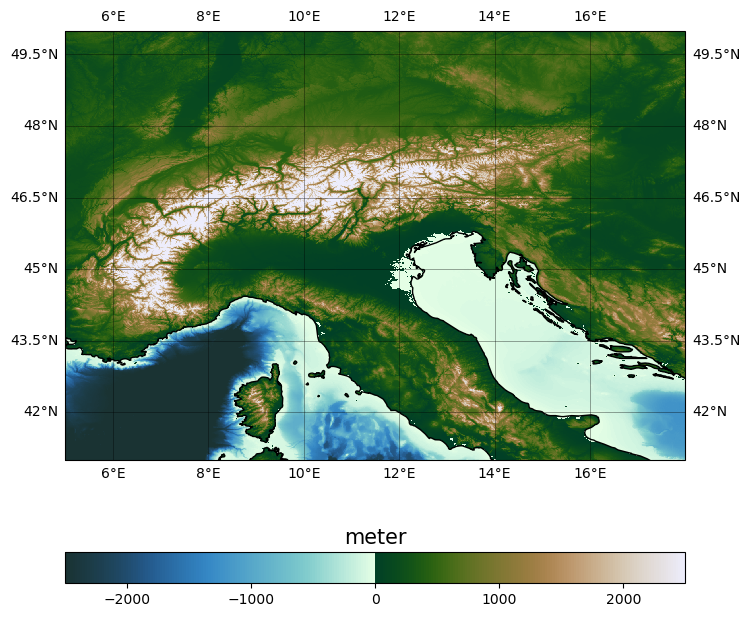

In [21]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=s_colormap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
cb = plt.colorbar(im1, orientation="horizontal", shrink=1)
cb.ax.set_title("meter", fontsize=15)

# adding overview map and data locations

In [23]:
# define polygon extend (repeat first point to close the polygon)
x_ps_point_list = [5, 5, 18, 18, 5]
y_ps_point_list = [41, 50, 50, 41, 41]

# create the polygon and also create a GeoSeries, which holds the polygon for plotting with geopandas
polygon_geom = Polygon(zip(x_ps_point_list, y_ps_point_list))
polygon_alps = gpd.GeoSeries(polygon_geom)

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

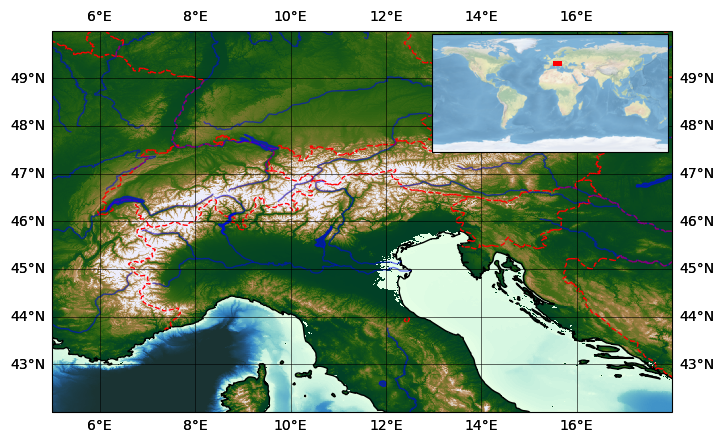

In [33]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 42, 50])
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=s_colormap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# insert an additional axes for the overview map
ax2 = plt.axes([0.6, 0.53, 0.295, 0.25], projection=ccrs.PlateCarree())

ax2.stock_img()
polygon_alps.plot(ax=ax2, color="red", transform=ccrs.PlateCarree())

In [ ]:
cartopy.crs.epsg(code)

C:\Users\maxim\.conda\envs\JIF3D\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

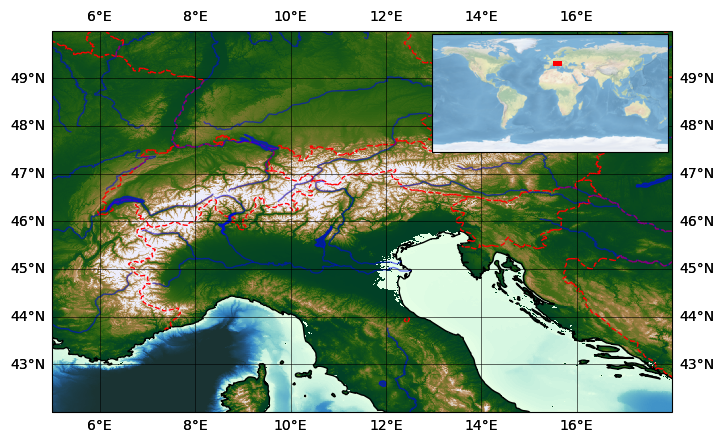

In [35]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 42, 50])
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=s_colormap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

# insert an additional axes for the overview map
ax2 = plt.axes([0.6, 0.53, 0.295, 0.25], projection=ccrs.PlateCarree())

ax2.stock_img()
polygon_alps.plot(ax=ax2, color="red", transform=ccrs.PlateCarree())